# Deal with overfitting in neural network

### get the data and decode the data

In [2]:
from tensorflow.keras.datasets import imdb

In [3]:
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

/Users/david/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/datasets/imdb.py:128: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/david/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/datasets/imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [7]:
max([max(i) for i in train_data])  #Because you’re restricting yourself to the top 10,000 most frequent words, no word index will exceed 10,000:

9999

In [22]:
word_index = imdb.get_word_index()

In [23]:
revise_index = dict([(value, key) for (key, value) in word_index.items()])

In [42]:
word_index.get('film') # this can get the word index

19

In [43]:
revise_index.get(19) # this can get the corresponding word of the index

'film'

In [61]:
decoded_review = ' '.join([revise_index.get(i-3,'') for i in train_data[0]]).strip()

In [62]:
decoded_review

"this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert  is an amazing actor and now the same being director  father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for  and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also  to the two little boy's that played the  of norman and paul they were just brilliant children are often left out of the  list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the 

In [64]:
from nltk.corpus import stopwords

In [77]:
clean_msg = [i for i in decoded_review.split() if i.lower() not in stopwords.words('english')] # this is eliminate the stopwords

In [ ]:
print(clean_msg)

['film', 'brilliant', 'casting', 'location', 'scenery', 'story', 'direction', "everyone's", 'really', 'suited', 'part', 'played', 'could', 'imagine', 'robert', 'amazing', 'actor', 'director', 'father', 'came', 'scottish', 'island', 'loved', 'fact', 'real', 'connection', 'film', 'witty', 'remarks', 'throughout', 'film', 'great', 'brilliant', 'much', 'bought', 'film', 'soon', 'released', 'would', 'recommend', 'everyone', 'watch', 'fly', 'fishing', 'amazing', 'really', 'cried', 'end', 'sad', 'know', 'say', 'cry', 'film', 'must', 'good', 'definitely', 'also', 'two', 'little', "boy's", 'played', 'norman', 'paul', 'brilliant', 'children', 'often', 'left', 'list', 'think', 'stars', 'play', 'grown', 'big', 'profile', 'whole', 'film', 'children', 'amazing', 'praised', 'done', 'think', 'whole', 'story', 'lovely', 'true', "someone's", 'life', 'shared', 'us']


### Prepare the data (one_hot_encoding)

In [78]:
import numpy as np

In [81]:
def vectorize_sequence(sequence, dimension=10000):
    result = np.zeros((len(sequence), dimension))
    for i, sequence in enumerate(sequence):
        result[i, sequence] = 1
    return result

In [83]:
Xtrain = vectorize_sequence(train_data)
Xtest = vectorize_sequence(test_data)

In [86]:
ytrain = np.asarray(train_labels).astype('float32')
ytest = np.asarray(train_labels).astype('float32')

### build the neural network model

In [88]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [158]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [159]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [160]:
# sparate the data into train and validation set

In [161]:
X_val = Xtrain[:10000]
y_val = ytrain[:10000]

In [162]:
partial_x_train = Xtrain[10000:]
partial_y_train = ytrain[10000:]

In [163]:
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=[X_val, y_val])

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.5739 - acc: 0.7217 - val_loss: 0.4271 - val_acc: 0.8529
Epoch 2/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.3215 - acc: 0.8974 - val_loss: 0.3061 - val_acc: 0.8856
Epoch 3/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.2169 - acc: 0.9307 - val_loss: 0.2805 - val_acc: 0.8887
Epoch 4/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.1633 - acc: 0.9489 - val_loss: 0.2869 - val_acc: 0.8838
Epoch 5/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.1268 - acc: 0.9646 - val_loss: 0.2914 - val_acc: 0.8852
Epoch 6/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.0999 - acc: 0.9739 - val_loss: 0.3063 - val_acc: 0.8831
Epoch 7/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.0779 - acc: 0.9825 - val_loss: 0.3269 - val_ac

In [114]:
import matplotlib.pyplot as plt

In [151]:
def plot_validation_loss(model):
    val_loss=model.history.history['val_loss']
    epochs = range(1, 20+1)
    plt.plot(epochs, val_loss, 'ob',label='validation loss', alpha=0.5, mec='black')
    plt.xlabel('Epochs')
    plt.ylabel('Validation loss')

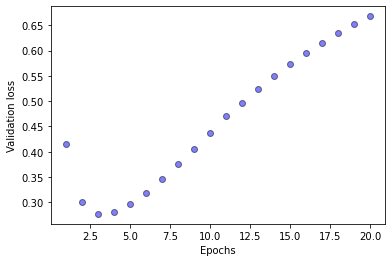

In [152]:
plot_validation_loss(model)

### Version of the model with lower capacity

In [217]:
model_low = models.Sequential()
model_low.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model_low.add(layers.Dense(4, activation='relu'))
model_low.add(layers.Dense(1, activation='sigmoid'))

model_low.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [218]:
model_low.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=[X_val, y_val])

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.6371 - acc: 0.6442 - val_loss: 0.5828 - val_acc: 0.7215
Epoch 2/20
15000/15000 [==============================] - 3s 167us/step - loss: 0.5264 - acc: 0.8092 - val_loss: 0.5046 - val_acc: 0.8219
Epoch 3/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.4392 - acc: 0.8803 - val_loss: 0.4333 - val_acc: 0.8580
Epoch 4/20
15000/15000 [==============================] - 1s 69us/step - loss: 0.3594 - acc: 0.9131 - val_loss: 0.3739 - val_acc: 0.8769
Epoch 5/20
15000/15000 [==============================] - 1s 71us/step - loss: 0.2967 - acc: 0.9283 - val_loss: 0.3337 - val_acc: 0.8870
Epoch 6/20
15000/15000 [==============================] - 1s 70us/step - loss: 0.2518 - acc: 0.9355 - val_loss: 0.3093 - val_acc: 0.8873
Epoch 7/20
15000/15000 [==============================] - 1s 73us/step - loss: 0.2174 - acc: 0.9442 - val_loss: 0.2946 - val_a

In [219]:
def comparing_validation_loss(model1, model2):
    val_loss1=model1.history.history['val_loss']
    val_loss2=model2.history.history['val_loss']
    epochs = range(1, 20+1)
    plt.plot(epochs, val_loss1, 'ob',label='original validation loss', alpha=0.5, mec='black')
    plt.plot(epochs, val_loss2, '^r',label='validation loss with changed capacity', alpha=0.5, mec='black')
    plt.xlabel('Epochs')
    plt.ylabel('Validation loss')
    plt.legend(loc='lower right')

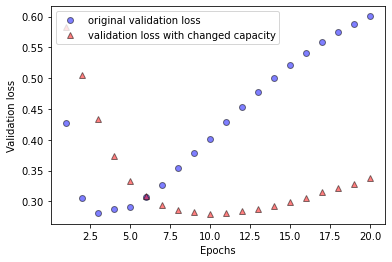

In [221]:
comparing_validation_loss(model, model_low)
plt.legend(loc='upper left')
# As you can see, the smaller network starts overfitting later than the original network, and its performance degrades more slowly once it starts overfitting.

### Version of the model with higher capacity

In [223]:
model_high = models.Sequential()
model_high.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model_high.add(layers.Dense(512, activation='relu'))
model_high.add(layers.Dense(1, activation='sigmoid'))

model_high.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [224]:
model_high.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=[X_val, y_val])

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 415us/step - loss: 0.3922 - acc: 0.8289 - val_loss: 0.2899 - val_acc: 0.8811
Epoch 2/20
15000/15000 [==============================] - 4s 263us/step - loss: 0.1294 - acc: 0.9559 - val_loss: 0.3333 - val_acc: 0.8830
Epoch 3/20
15000/15000 [==============================] - 4s 270us/step - loss: 0.0416 - acc: 0.9887 - val_loss: 0.4395 - val_acc: 0.8761
Epoch 4/20
15000/15000 [==============================] - 4s 295us/step - loss: 0.0075 - acc: 0.9991 - val_loss: 0.5618 - val_acc: 0.8762
Epoch 5/20
15000/15000 [==============================] - 4s 271us/step - loss: 0.0015 - acc: 0.9999 - val_loss: 0.6149 - val_acc: 0.8778
Epoch 6/20
15000/15000 [==============================] - 4s 275us/step - loss: 4.5361e-04 - acc: 1.0000 - val_loss: 0.6554 - val_acc: 0.8790
Epoch 7/20
15000/15000 [==============================] - 4s 282us/step - loss: 2.6016e-04 - acc: 1.0000 - val_loss: 0

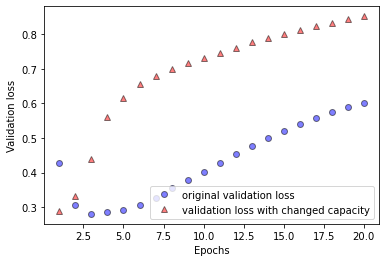

In [226]:
comparing_validation_loss(model, model_high) 
# The bigger network starts overfitting almost immediately, after just one epoch, and it overfits much more severely.

### Adding weight regularization

In [229]:
from tensorflow.keras import regularizers

In [232]:
## regularizer.l1(0.001)
## regularizer.l2(0.001)
## regularizer.l1_l2(0.001)

In [233]:
model_reg = models.Sequential()
model_reg.add(layers.Dense(16, kernel_regularizer= regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model_reg.add(layers.Dense(16, kernel_regularizer= regularizers.l2(0.001), activation='relu'))
model_reg.add(layers.Dense(1, activation='sigmoid'))

model_reg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [234]:
model_reg.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=[X_val, y_val])

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 356us/step - loss: 0.6043 - acc: 0.7599 - val_loss: 0.4453 - val_acc: 0.8599
Epoch 2/20
15000/15000 [==============================] - 1s 77us/step - loss: 0.3483 - acc: 0.9023 - val_loss: 0.3462 - val_acc: 0.8862
Epoch 3/20
15000/15000 [==============================] - 1s 71us/step - loss: 0.2623 - acc: 0.9305 - val_loss: 0.3357 - val_acc: 0.8861
Epoch 4/20
15000/15000 [==============================] - 1s 67us/step - loss: 0.2228 - acc: 0.9466 - val_loss: 0.3402 - val_acc: 0.8848
Epoch 5/20
15000/15000 [==============================] - 1s 66us/step - loss: 0.1982 - acc: 0.9588 - val_loss: 0.3483 - val_acc: 0.8839
Epoch 6/20
15000/15000 [==============================] - 1s 65us/step - loss: 0.1801 - acc: 0.9674 - val_loss: 0.3675 - val_acc: 0.8812
Epoch 7/20
15000/15000 [==============================] - 1s 66us/step - loss: 0.1684 - acc: 0.9721 - val_loss: 0.3766 - val_ac

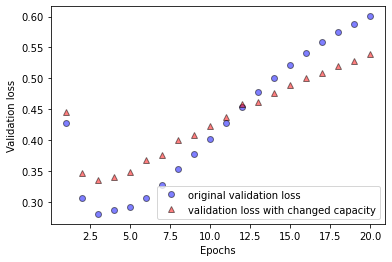

In [235]:
comparing_validation_loss(model, model_reg)
#l2(0.001) means every coefficient in the weight matrix of the layer will add 0.001 * weight_coefficient_value to the total loss of the network

### Adding dropout to the IMDB network

In [237]:
model_dropout = models.Sequential()
model_dropout.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_dropout.add(layers.Dropout(0.5))
model_dropout.add(layers.Dense(16, activation='relu'))
model_dropout.add(layers.Dropout(0.5))
model_dropout.add(layers.Dense(1, activation='sigmoid'))

model_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [239]:
model_dropout.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=[X_val, y_val])

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 287us/step - loss: 0.6740 - acc: 0.5721 - val_loss: 0.6197 - val_acc: 0.7938
Epoch 2/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.5797 - acc: 0.7089 - val_loss: 0.4808 - val_acc: 0.8587
Epoch 3/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.4615 - acc: 0.8009 - val_loss: 0.3693 - val_acc: 0.8726
Epoch 4/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.3678 - acc: 0.8519 - val_loss: 0.3015 - val_acc: 0.8851
Epoch 5/20
15000/15000 [==============================] - 1s 75us/step - loss: 0.3143 - acc: 0.8790 - val_loss: 0.2786 - val_acc: 0.8897
Epoch 6/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.2713 - acc: 0.9005 - val_loss: 0.2713 - val_acc: 0.8885
Epoch 7/20
15000/15000 [==============================] - 2s 147us/step - loss: 0.2358 - acc: 0.9187 - val_loss: 0.2712 - val_a

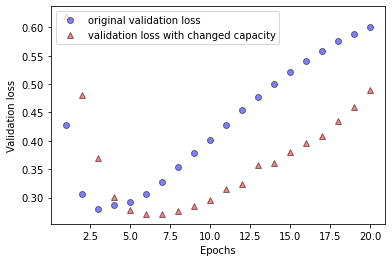

In [242]:
comparing_validation_loss(model, model_dropout)
plt.legend(loc='upper left')
# this is a clear improvement over the original network in terms of overfitting.

### early stoping

In [245]:
from tensorflow.keras import callbacks

In [247]:
earlystop = callbacks.EarlyStopping(monitor='val_loss', patience=5, mode=min)

In [250]:
model_early = models.Sequential()
model_early.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_early.add(layers.Dense(16, activation='relu'))
model_early.add(layers.Dense(1, activation='sigmoid'))

model_early.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [251]:
model_early.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=[X_val, y_val], callbacks=[earlystop])

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 375us/step - loss: 0.5487 - acc: 0.7570 - val_loss: 0.3959 - val_acc: 0.8587
Epoch 2/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.2977 - acc: 0.9034 - val_loss: 0.2961 - val_acc: 0.8871
Epoch 3/20
15000/15000 [==============================] - 1s 71us/step - loss: 0.2038 - acc: 0.9326 - val_loss: 0.2776 - val_acc: 0.8875
Epoch 4/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.1525 - acc: 0.9515 - val_loss: 0.2795 - val_acc: 0.8869
Epoch 5/20
15000/15000 [==============================] - 1s 70us/step - loss: 0.1166 - acc: 0.9668 - val_loss: 0.2947 - val_acc: 0.8864
Epoch 6/20
15000/15000 [==============================] - 1s 69us/step - loss: 0.0910 - acc: 0.9762 - val_loss: 0.3160 - val_acc: 0.8816
Epoch 7/20
15000/15000 [==============================] - 1s 69us/step - loss: 0.0704 - acc: 0.9843 - val_loss: 0.3386 - val_ac

In [256]:
earl_stop = model_early.history.history['val_loss']

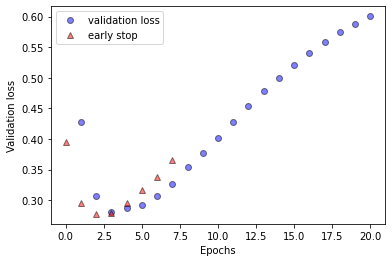

In [267]:
plot_validation_loss(model)
plt.plot(range(8), earl_stop, '^r', alpha=0.5, mec='black', label='early stop')
plt.legend(loc='best'); # the fitting process stops at epoch=8-5=3, becuz we set patience=5